In [3]:
import intel_extension_for_pytorch as ipex
from torchvision.datasets import CIFAR10, CelebA
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.optim import Optimizer
import torch.nn as nn
import torch
from typing import Dict, List, Set 
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
trainset = CIFAR10(root='../data', train=True,  transform=transforms.ToTensor(), download=True)
testset  = CIFAR10(root='../data', train=False, transform=transforms.ToTensor(), download=True)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
BATCH_SIZE = 8
trainloader = DataLoader(trainset, BATCH_SIZE, shuffle=True, num_workers=2)
testloader  = DataLoader(testset, BATCH_SIZE, shuffle=True, num_workers=2)

In [6]:
classes = {i:name for i, name in enumerate(trainset.classes)}
classes

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

In [7]:
imgs, labels = next(iter(trainloader))

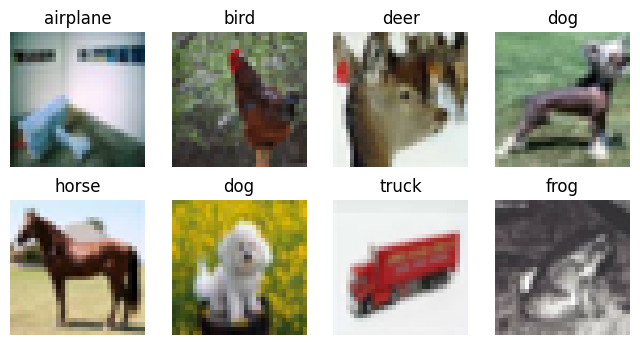

In [8]:
def show_imgs(imgs: torch.Tensor, labels: torch.Tensor):
    imgs = imgs.cpu().detach().clone().permute(0, 2, 3, 1)
    labels = labels.cpu().detach().clone()
    n = len(labels)
    rows, cols = n // 4, 4
    plt.figure(figsize=(8, 4))
    for i in range(n):
        plt.subplot(rows, cols, i+1)
        plt.imshow(imgs[i-1])
        plt.title(classes[labels[i-1].item()])
        plt.axis(False)
    plt.show()

show_imgs(imgs, labels)

In [9]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        ...
    
    def forward(self, input):
        ...
    
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        ...
    
    def forward(self, input):
        ...

class ModelConfig:
    def __init__(self, batch_size, epochs, classes):
        self.BATCH_SIZE = batch_size
        self.EPOCHS = epochs
        self.CLASSES = classes

class CGAN(nn.Module):
    def __init__(self, generator, discriminator, classes, params: ModelConfig):
        self.generator = generator
        self.discriminator = discriminator
        self.clases = classes
        self.params = params

    def forward(self, input):
        ...